In [205]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [206]:
# https://docs.python.org/3/library/datetime.html
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [207]:
# parse hour column with parse_date function above to convert to a datetime format
df = pd.read_csv('http://bit.ly/mobile_ad_clicks_1k_csv', parse_dates = ['hour'], date_parser = parse_date)

In [208]:
# convert example hour value into a datetime format
pd.to_datetime('14102720', format='%y%m%d%H')

Timestamp('2014-10-27 20:00:00')

In [209]:
# remove the ellipsis to show all columns
pd.set_option('display.max_columns', None)
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.125360e+19,1,2014-10-27 20:00:00,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,cd474f0e,711ee120,1,0,17653,300,250,1994,2,39,-1,33
1,1.063110e+19,1,2014-10-29 16:00:00,1005,1,2fdff0f2,2296b5b3,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,348533f2,1f0bc64f,1,0,15701,320,50,1722,0,35,-1,79
2,6.320730e+18,0,2014-10-29 08:00:00,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,af9205f9,f60c2fd3,1,0,22268,320,50,2566,3,815,100156,42
3,1.533010e+19,0,2014-10-22 07:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,a99f214a,c24aca9b,d787e91b,1,0,21694,320,50,2497,3,43,100151,42
4,1.327760e+19,0,2014-10-29 13:00:00,1005,1,57ef2c87,bd6d812f,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,829c7311,daa861e9,1,0,19772,320,50,2227,0,935,100075,48


In [210]:
# counts and date types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
id                  1000 non-null float64
click               1000 non-null int64
hour                1000 non-null datetime64[ns]
C1                  1000 non-null int64
banner_pos          1000 non-null int64
site_id             1000 non-null object
site_domain         1000 non-null object
site_category       1000 non-null object
app_id              1000 non-null object
app_domain          995 non-null object
app_category        1000 non-null object
device_id           1000 non-null object
device_ip           1000 non-null object
device_model        1000 non-null object
device_type         1000 non-null int64
device_conn_type    1000 non-null int64
C14                 1000 non-null int64
C15                 1000 non-null int64
C16                 1000 non-null int64
C17                 1000 non-null int64
C18                 1000 non-null int64
C19                 1000 non-null i

In [211]:
# number of null values per column
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          5
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [212]:
# unique values per column (useful for categorical variable identification)
df.nunique()

id                  998
click                 2
hour                224
C1                    5
banner_pos            4
site_id             161
site_domain         129
site_category        10
app_id              115
app_domain           20
app_category          9
device_id           187
device_ip           953
device_model        389
device_type           4
device_conn_type      4
C14                 344
C15                   4
C16                   5
C17                 202
C18                   4
C19                  50
C20                  70
C21                  48
dtype: int64

In [213]:
# find the most common app_domain value
mode_app_domain = df['app_domain'].value_counts().index[0]
mode_app_domain

'7801e8d9'

In [214]:
# replace null values with the most frequent app_domain occurrence
df['app_domain'] = df['app_domain'].fillna(mode_app_domain)

In [216]:
# verify null values removed
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [217]:
df['click_date_hour'] = df['hour']

In [219]:
df['click_date_hour'].head()

0   2014-10-27 20:00:00
1   2014-10-29 16:00:00
2   2014-10-29 08:00:00
3   2014-10-22 07:00:00
4   2014-10-29 13:00:00
Name: click_date_hour, dtype: datetime64[ns]

In [220]:
# overwrite hour column with just the hour value from the timestamp
df['hour'] = df['click_date_hour'].dt.hour

In [221]:
df['dayofweek'] = df['click_date_hour'].dt.dayofweek

In [224]:
df[['click_date_hour','hour','dayofweek']]

,click_date_hour,hour,dayofweek
0,2014-10-27 20:00:00,20,0
1,2014-10-29 16:00:00,16,2
2,2014-10-29 08:00:00,8,2
3,2014-10-22 07:00:00,7,2
4,2014-10-29 13:00:00,13,2
5,2014-10-21 05:00:00,5,1
6,2014-10-23 02:00:00,2,3
7,2014-10-21 10:00:00,10,1
8,2014-10-21 18:00:00,18,1
9,2014-10-24 12:00:00,12,4


In [225]:
# dummy code categorical variables
df_with_dummies = pd.get_dummies(df, columns=['site_category','app_category','banner_pos'])
df_with_dummies.sample(5)

,id,click,hour,C1,site_id,site_domain,app_id,app_domain,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,click_date_hour,dayofweek,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_50e219e0,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_c0dd3be3,site_category_f028772b,site_category_f66779e6,app_category_07d7df22,app_category_09481d60,app_category_0f2161f8,app_category_4ce2e9fc,app_category_8ded1f7a,app_category_cef3e649,app_category_d1327cf5,app_category_f95efa07,app_category_fc6fa53d,banner_pos_0,banner_pos_1,banner_pos_2,banner_pos_7
969,1.238190e+19,1,19,1005,85f751fd,c4e18dd6,e2fcccd2,5c5a694b,a99f214a,08b74698,ee007ad3,1,0,4687,320,50,423,2,39,100148,32,2014-10-25 19:00:00,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
556,1.642120e+19,0,10,1005,85f751fd,c4e18dd6,92f5800b,ae637522,a99f214a,71c93712,981edffc,1,0,21189,320,50,2424,1,161,100189,71,2014-10-25 10:00:00,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
590,1.608870e+19,0,19,1010,85f751fd,c4e18dd6,ffc6ffd0,7801e8d9,46a3ce05,d4489e3a,41c87f95,4,0,23820,320,50,2728,0,290,-1,42,2014-10-29 19:00:00,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
214,1.500540e+19,0,5,1005,85f751fd,c4e18dd6,45aff1a2,5c620f04,8b28c305,45229837,4ea23a13,1,0,21153,320,50,2420,2,35,-1,69,2014-10-21 05:00:00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
920,1.377220e+19,0,17,1005,e151e245,7e091613,ecad2386,7801e8d9,a99f214a,dab29f53,779d90c2,1,0,17583,320,50,1991,2,39,-1,33,2014-10-21 17:00:00,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


------------------

In [226]:
df = pd.read_csv('http://bit.ly/digital_ad_sales_csv')

In [227]:
df.shape

(200, 5)

In [228]:
df.head()

,audience_id,search,display,social,sales
0,370202,9204.0,1512.0,2768.0,22100.0
1,172422,1780.0,1572.0,1804.0,10400.0
2,323144,688.0,1836.0,2772.0,9300.0
3,422335,6060.0,1652.0,2340.0,18500.0
4,194985,7232.0,432.0,2336.0,12900.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
audience_id    200 non-null int64
search         199 non-null float64
display        197 non-null float64
social         200 non-null float64
sales          200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [230]:
df.isnull().sum()

audience_id    0
search         1
display        3
social         0
sales          0
dtype: int64

In [231]:
# remove null values in the search column
df.dropna(subset=['search'], inplace=True)

In [234]:
df.isnull().sum()

audience_id    0
search         0
display        3
social         0
sales          0
dtype: int64

In [235]:
mean_display = df['display'].mean()
mean_display

933.4081632653061

In [236]:
# replace null display values with display's mean
df['display'] = df['display'].fillna(mean_display)

In [238]:
# confirm nulls removed
df.isnull().sum()

audience_id    0
search         0
display        0
social         0
sales          0
dtype: int64

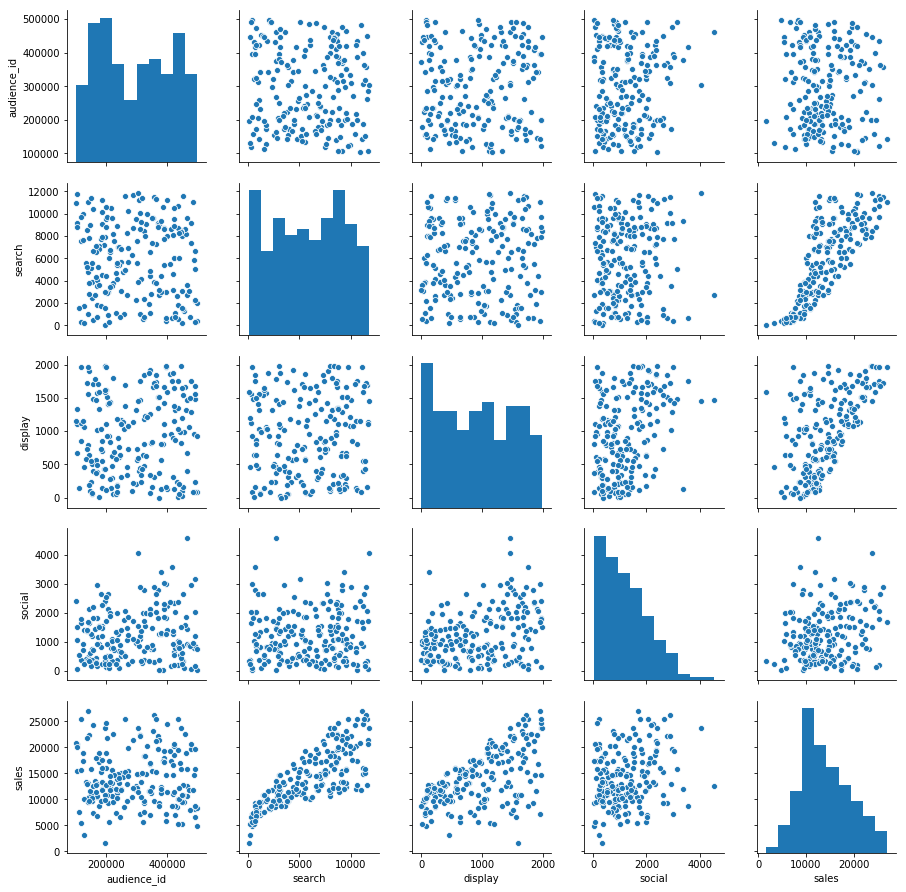

In [239]:
sns.pairplot(df)

In [240]:
# confirm sales from a continous to categorical variable
df['sales_level'] = pd.qcut(df['sales'], 4, labels=False)

In [241]:
df.head()

,audience_id,search,display,social,sales,sales_level
0,370202,9204.0,1512.0,2768.0,22100.0,3
1,172422,1780.0,1572.0,1804.0,10400.0,1
2,323144,688.0,1836.0,2772.0,9300.0,0
3,422335,6060.0,1652.0,2340.0,18500.0,3
4,194985,7232.0,432.0,2336.0,12900.0,1


In [242]:
df['search_level'] = pd.qcut(df['search'], 4, labels=False)
df['display_level'] = pd.qcut(df['display'], 4, labels=False)
df['social_level'] = pd.qcut(df['social'], 4, labels=False)

In [243]:
df.head()

,audience_id,search,display,social,sales,sales_level,search_level,display_level,social_level
0,370202,9204.0,1512.0,2768.0,22100.0,3,3,3,3
1,172422,1780.0,1572.0,1804.0,10400.0,1,0,3,2
2,323144,688.0,1836.0,2772.0,9300.0,0,0,3,3
3,422335,6060.0,1652.0,2340.0,18500.0,3,2,3,3
4,194985,7232.0,432.0,2336.0,12900.0,1,2,1,3


In [244]:
df.columns

Index(['audience_id', 'search', 'display', 'social', 'sales', 'sales_level',
       'search_level', 'display_level', 'social_level'],
      dtype='object')

In [245]:
# scale data to the mean centered around 0
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [246]:
scaled_df

,audience_id,search,display,social,sales,sales_level,search_level,display_level,social_level
0,0.657725,0.971235,0.976406,1.773246,1.551607,1.360278,1.341198,1.345711,1.351132
1,-1.061471,-1.192465,1.077660,0.665077,-0.692248,-0.432406,-1.336713,1.345711,0.454881
2,0.248675,-1.510724,1.523175,1.777844,-0.903209,-1.328748,-1.336713,1.345711,1.351132
3,1.110890,0.054927,1.212664,1.281237,0.861190,1.360278,0.448561,1.345711,1.351132
4,-0.865343,0.396502,-0.846155,1.276639,-0.212792,-0.432406,0.448561,-0.439599,1.351132
5,0.868544,-1.609816,1.725681,2.039942,-1.305952,-1.328748,-1.336713,1.345711,1.351132
6,0.035032,-1.040912,0.638895,-0.328137,-0.423753,-0.432406,-1.336713,0.453056,-0.441370
7,-1.316413,-0.309964,-0.252135,-0.875324,-0.155257,0.463936,-0.444076,-0.439599,-1.337621
8,1.747831,-1.610982,-1.433424,-1.362734,-1.766230,-1.328748,-1.336713,-1.332254,-1.337621
9,1.327402,0.618001,-1.399673,-0.433896,-0.653892,-0.432406,0.448561,-1.332254,-0.441370
